<a href="https://colab.research.google.com/github/MuindeEsther/Data-Science-Projects/blob/main/datavisuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cardio_alco_path = '/content/drive/MyDrive/cardio_alco.csv'
cardio_base_path = '/content/drive/MyDrive/cardio_base.csv'
covid_data_path = '/content/drive/MyDrive/covid_data.csv'

cardio_alco_df = pd.read_csv(cardio_alco_path)
cardio_base_df = pd.read_csv(cardio_base_path)
covid_data_df = pd.read_csv(covid_data_path)

# Display the first few rows of each dataframe to understand their structure
(cardio_alco_df.head(), cardio_base_df.head(), covid_data_df.head())


(  id;alco
 0    44;0
 1    45;0
 2    46;0
 3    47;0
 4    49;0,
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
 0   0  18393       2     168    62.0    110     80            1      0
 1   1  20228       1     156    85.0    140     90            3      0
 2   2  18857       1     165    64.0    130     70            3      0
 3   3  17623       2     169    82.0    150    100            1      0
 4   4  17474       1     156    56.0    100     60            1      0,
       location        date  new_cases  new_deaths  population  \
 0  Afghanistan  2019-12-31          0           0  38928341.0   
 1  Afghanistan  2020-01-01          0           0  38928341.0   
 2  Afghanistan  2020-01-02          0           0  38928341.0   
 3  Afghanistan  2020-01-03          0           0  38928341.0   
 4  Afghanistan  2020-01-04          0           0  38928341.0   
 
    aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
 0                  2.581     

We've loaded the datasets successfully. Here's a brief overview of their structures:

Cardio Alcohol Dataset (cardio_alco.csv): This dataset appears to have two columns, id and alco, with the data being separated by semicolons (;). The alco column likely indicates alcohol consumption, but it seems we'll need to adjust the delimiter during loading to correctly parse this dataset.

Cardio Base Dataset (cardio_base.csv): It contains information related to individuals' health metrics such as age, gender, height, weight, blood pressure (ap_hi and ap_lo), cholesterol levels, and smoking status.

COVID Data (covid_data.csv): This dataset includes daily COVID-19 case and death counts along with information like location, population, percentage of the population aged 65 or older, GDP per capita, and hospital beds per thousand people.

Given this initial look, let's reload the Cardio Alcohol Dataset with the correct delimiter. Then we can proceed with data cleaning and preparation for each dataset

In [ ]:
# Reload the Cardio Alcohol Dataset with the correct delimiter
cardio_alco_df = pd.read_csv(cardio_alco_path, delimiter=';')

# Display the first few rows again to confirm the structure is now correct
cardio_alco_df.head()


,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [ ]:
# Assess missing values and data types for each dataset
missing_values_summary = {
    "Cardio Alcohol Dataset": cardio_alco_df.isnull().sum(),
    "Cardio Base Dataset": cardio_base_df.isnull().sum(),
    "COVID Data": covid_data_df.isnull().sum()
}

data_types_summary = {
    "Cardio Alcohol Dataset": cardio_alco_df.dtypes,
    "Cardio Base Dataset": cardio_base_df.dtypes,
    "COVID Data": covid_data_df.dtypes
}

(missing_values_summary, data_types_summary)


({'Cardio Alcohol Dataset': id      0
  alco    0
  dtype: int64,
  'Cardio Base Dataset': id             0
  age            0
  gender         0
  height         0
  weight         0
  ap_hi          0
  ap_lo          0
  cholesterol    0
  smoke          0
  dtype: int64,
  'COVID Data': location                         0
  date                             0
  new_cases                        0
  new_deaths                       0
  population                      64
  aged_65_older_percent         2439
  gdp_per_capita                2371
  hospital_beds_per_thousand    3938
  dtype: int64},
 {'Cardio Alcohol Dataset': id      int64
  alco    int64
  dtype: object,
  'Cardio Base Dataset': id               int64
  age              int64
  gender           int64
  height           int64
  weight         float64
  ap_hi            int64
  ap_lo            int64
  cholesterol      int64
  smoke            int64
  dtype: object,
  'COVID Data': location                       object
  d

### Data Cleaning and Preparation Summary:
**Cardio Alcohol Dataset:**
* Missing Values: No missing values detected.
* Data Types: Both id and alco columns are integers, which is appropriate for their respective data.

**Cardio Base Dataset:**

* Missing Values: No missing values detected.
* Data Types: Mostly integers, except weight, which is a float. This setup is suitable for the nature of the data.

**COVID Data:**
* Missing Values: Missing values are present in several columns:
population (64 missing values),
aged_65_older_percent (2,439 missing values),
gdp_per_capita (2,371 missing values),
hospital_beds_per_thousand (3,938 missing values).
* Data Types: Dates are stored as objects, which might need conversion to datetime for time-series analysis. Other data types are appropriate for the content of each column.

In [ ]:
# Convert 'date' column in COVID Data to datetime format
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

# Quick check on the conversion
covid_data_df.dtypes['date']


dtype('<M8[ns]')

## Covid Data Analysis
### Handling Missing Values in COVID Data:
Given the missing values in several columns (`population`, `aged_65_older_percent`, `gdp_per_capita`, `hospital_beds_per_thousand`), we have a few options:

* Imputation: For columns like population where missing values are relatively few, we could impute missing values using a central tendency measure (mean or median) or using more complex methods like interpolation, especially for time-series data.

* Exclusion: In cases where a significant portion of the data is missing, such as with `hospital_beds_per_thousand`, it might be more appropriate to exclude these from certain analyses if they could skew results.

* Filling with a constant value: For certain analyses, it might make sense to fill missing values with a constant, such as 0 or a placeholder value, depending on the context of the data and the analysis goal.

In [ ]:
covid_data_df.isnull().sum()

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [ ]:
# Impute missing values in 'population' with the median
covid_data_df['population'] = covid_data_df['population'].fillna(covid_data_df['population'].median())

# Fill missing values with a constant value for 'hospital_beds_per_thousand'
covid_data_df['hospital_beds_per_thousand'] = covid_data_df['hospital_beds_per_thousand'].fillna(-1)

# Fill missing values with a constant value for 'aged_65_older_percent' and 'gdp_per_capita'
covid_data_df['aged_65_older_percent'] = covid_data_df['aged_65_older_percent'].fillna(-1)
covid_data_df['gdp_per_capita'] = covid_data_df['gdp_per_capita'].fillna(-1)


In [ ]:
covid_data_df.isnull().sum()

location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64

#### Global trend of new cases and deaths over time

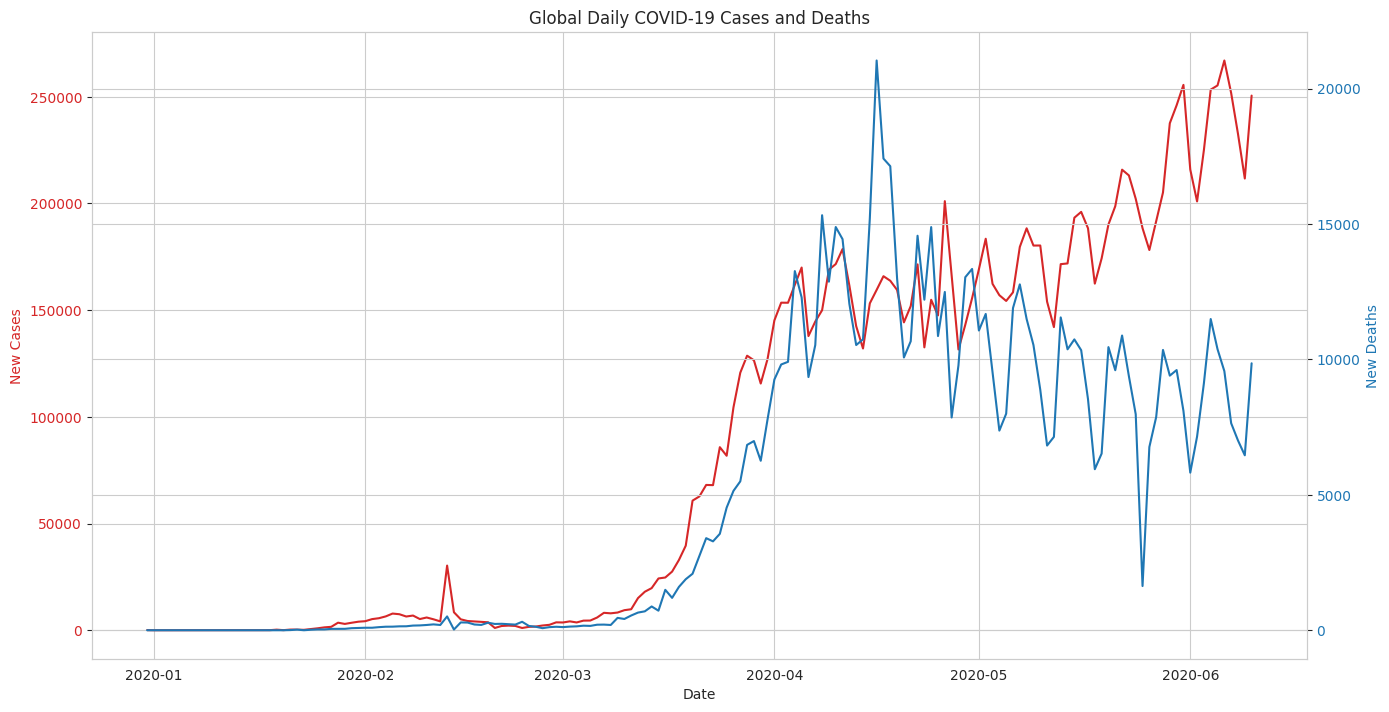

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Group data by date to see global trends
covid_global = covid_data_df.groupby('date').agg({'new_cases': 'sum', 'new_deaths': 'sum'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color=color)
ax1.plot(covid_global['date'], covid_global['new_cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('New Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(covid_global['date'], covid_global['new_deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Global Daily COVID-19 Cases and Deaths')
plt.savefig('fig_1a.png')
plt.show()


Lets identify the countries with the hisghest total cases and deaths to see where the pandemic hit hardest.

<ipython-input-10-3b6f1c12257b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_cases', y='location', data=total_cases_sorted, ax=axes[0], palette='viridis')
<ipython-input-10-3b6f1c12257b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_deaths', y='location', data=total_deaths_sorted, ax=axes[1], palette='inferno')


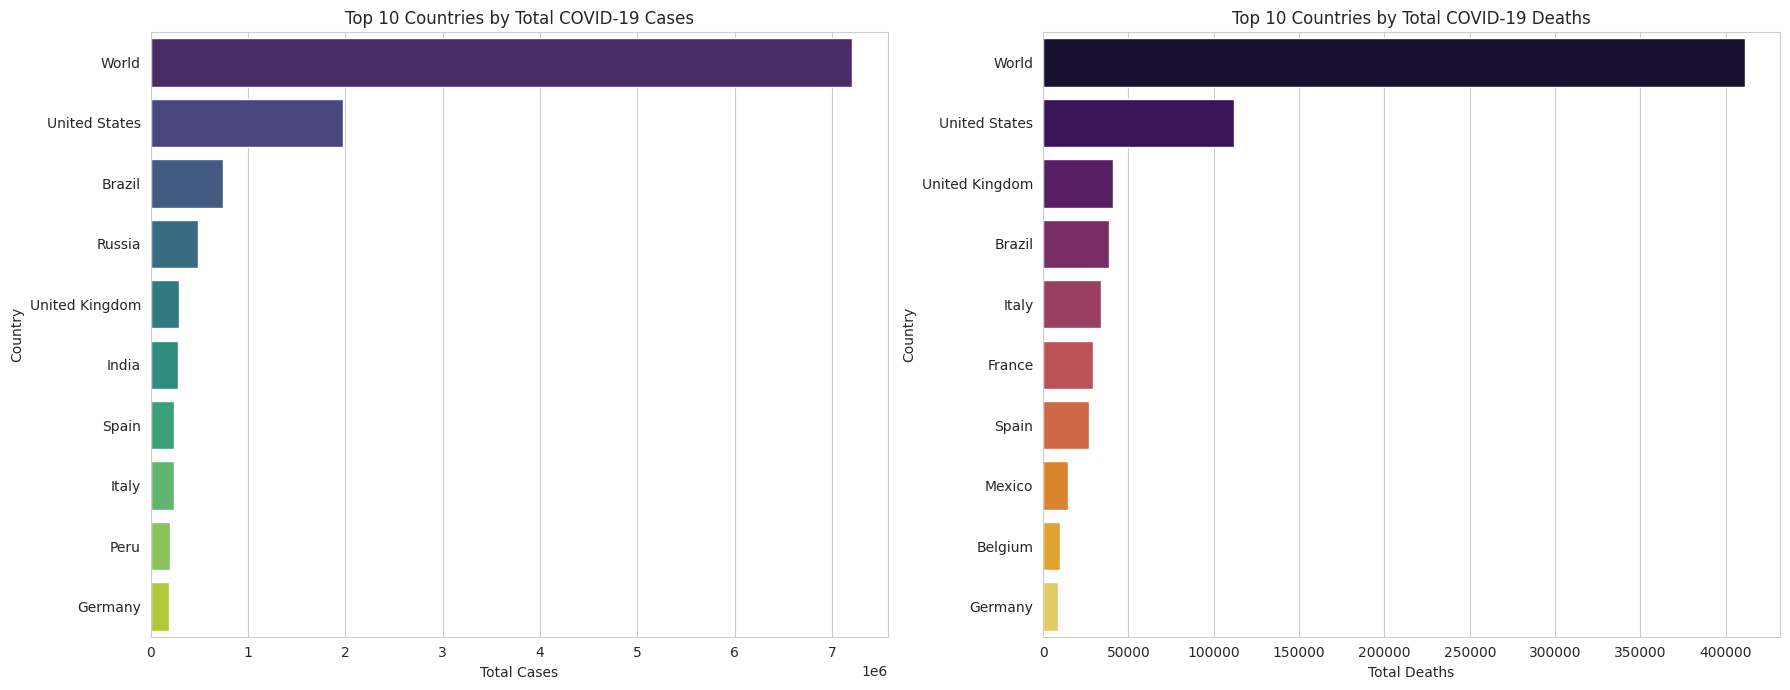

In [ ]:
# Calculate total cases and deaths for each country
total_by_country = covid_data_df.groupby('location').agg({'new_cases': 'sum', 'new_deaths': 'sum'}).reset_index()

# Sort by total cases and deaths
total_cases_sorted = total_by_country.sort_values(by='new_cases', ascending=False).head(10)
total_deaths_sorted = total_by_country.sort_values(by='new_deaths', ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

sns.barplot(x='new_cases', y='location', data=total_cases_sorted, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Countries by Total COVID-19 Cases')
axes[0].set_xlabel('Total Cases')
axes[0].set_ylabel('Country')

sns.barplot(x='new_deaths', y='location', data=total_deaths_sorted, ax=axes[1], palette='inferno')
axes[1].set_title('Top 10 Countries by Total COVID-19 Deaths')
axes[1].set_xlabel('Total Deaths')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.savefig('fig_1b.png')
plt.show()


Let's explore the relationship between a country's GDP per capita, hospital beds per thousand people and COVID_19 outcomes(cases and deaths)

Let's start with the analysis of GDP per capita against total COVID-19 cases and deaths

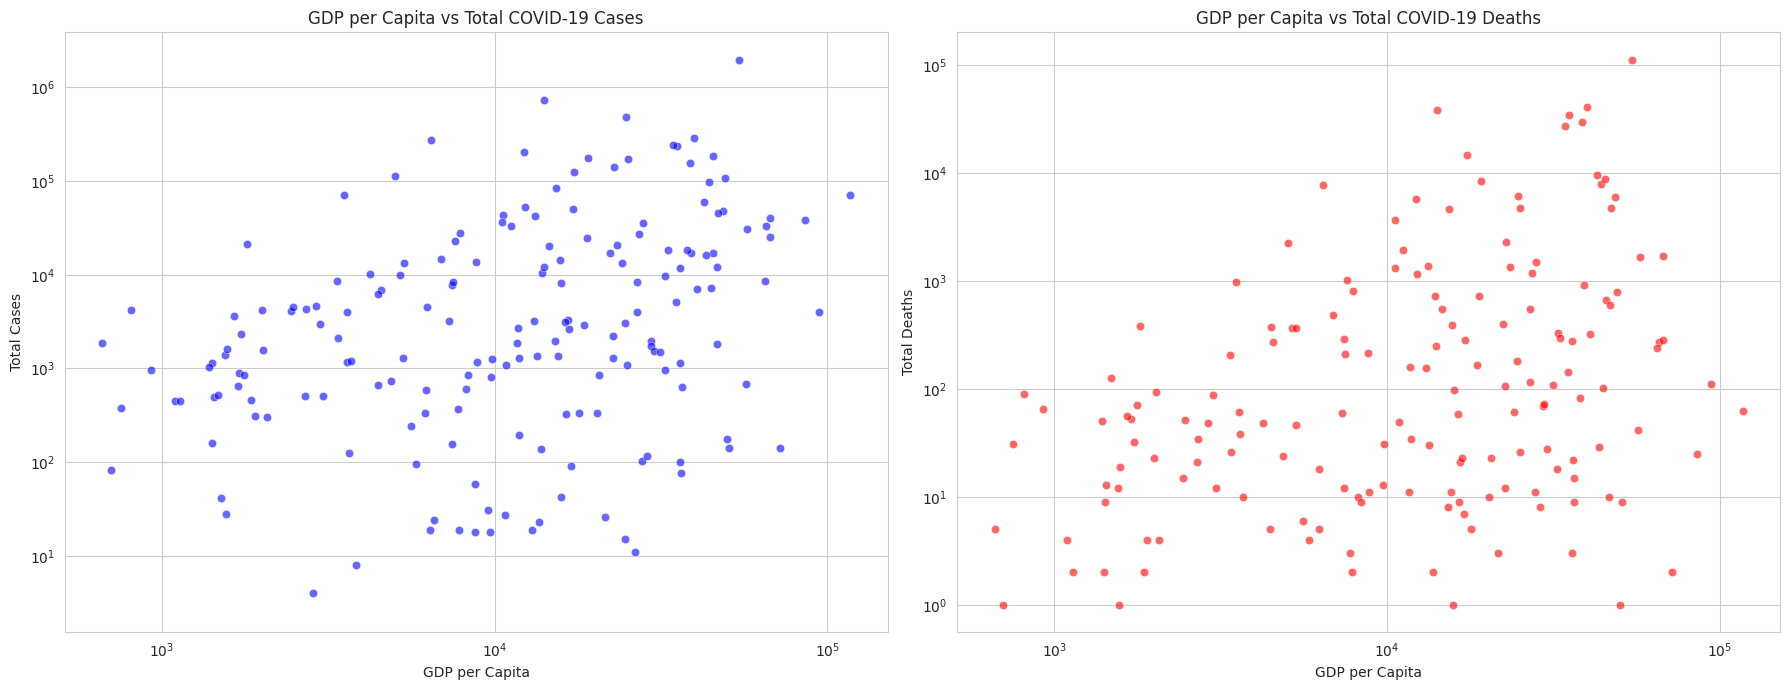

In [ ]:
# Prepare data for GDP vs COVID-19 outcomes analysis
# We'll use median values for GDP per capita and hospital beds per thousand to represent each country
country_metrics = covid_data_df.groupby('location').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'gdp_per_capita': 'median',
    'hospital_beds_per_thousand': 'median'
}).reset_index()

# Removing global and non-country entries or aggregations, such as "World" or "International"
country_metrics = country_metrics[~country_metrics['location'].isin(['World', 'International'])]

# Scatter plot for GDP per Capita vs Total COVID-19 Cases
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

sns.scatterplot(x='gdp_per_capita', y='new_cases', data=country_metrics, ax=ax[0], color='blue', alpha=0.6)
ax[0].set_title('GDP per Capita vs Total COVID-19 Cases')
ax[0].set_xlabel('GDP per Capita')
ax[0].set_ylabel('Total Cases')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Scatter plot for GDP per Capita vs Total COVID-19 Deaths
sns.scatterplot(x='gdp_per_capita', y='new_deaths', data=country_metrics, ax=ax[1], color='red', alpha=0.6)
ax[1].set_title('GDP per Capita vs Total COVID-19 Deaths')
ax[1].set_xlabel('GDP per Capita')
ax[1].set_ylabel('Total Deaths')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()


* GDP per Capita vs. Total Cases: There's a visible spread, indicating that countries with higher GDP per capita have varying levels of total cases. The log-scale implies that while there's no clear linear relationship, wealthier countries tend to report more cases, which could be influenced by testing capacity and reporting standards.

* GDP per Capita vs. Total Deaths: Similar to the cases, there's a spread in total deaths among countries with different GDP per capita levels. Wealthier countries appear to have higher reported deaths, but this also reflects the capacity to report and medical infrastructure to identify COVID-19 related deaths.

Now, let's look at hospital beds per thousand people against total COVID-19 cases and deaths. This analysis will help us understand if a higher healthcare capacity correlates with better outcomes in managing the pandemic.

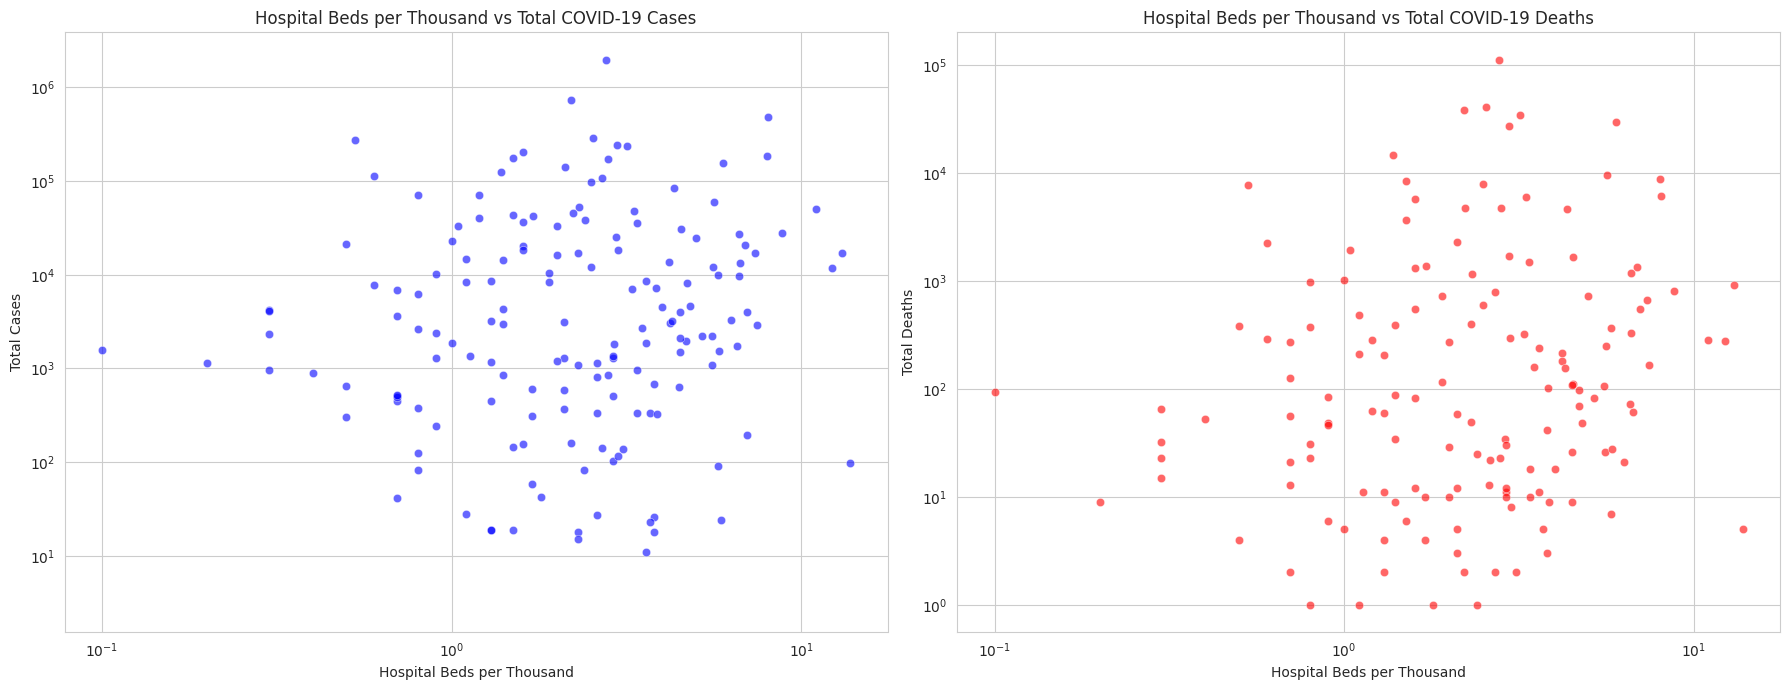

In [ ]:
# Scatter plot for Hospital Beds per Thousand vs Total COVID-19 Cases
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

sns.scatterplot(x='hospital_beds_per_thousand', y='new_cases', data=country_metrics, ax=ax[0], color='blue', alpha=0.6)
ax[0].set_title('Hospital Beds per Thousand vs Total COcodiVID-19 Cases')
ax[0].set_xlabel('Hospital Beds per Thousand')
ax[0].set_ylabel('Total Cases')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Scatter plot for Hospital Beds per Thousand vs Total COVID-19 Deaths
sns.scatterplot(x='hospital_beds_per_thousand', y='new_deaths', data=country_metrics, ax=ax[1], color='red', alpha=0.6)
ax[1].set_title('Hospital Beds per Thousand vs Total COVID-19 Deaths')
ax[1].set_xlabel('Hospital Beds per Thousand')
ax[1].set_ylabel('Total Deaths')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.tight_layout()
plt.savefig('fig_1c.png')
plt.show()


* Hospital Beds per Thousand vs. Total Cases: The data points are widely spread, suggesting that a higher number of hospital beds per thousand people doesn't directly correlate with fewer COVID-19 cases. This outcome could reflect various factors, including the speed of virus spread, public health measures, and testing capacity.

* Hospital Beds per Thousand vs. Total Deaths: Similarly, there's a spread in the data points without a clear pattern indicating that countries with more hospital beds per thousand have significantly fewer deaths. While healthcare capacity is crucial for treating severe cases, the total deaths also depend on other factors like the age distribution of the population, prevalence of comorbidities, and effectiveness of healthcare responses.

These analyses suggest that while economic factors and healthcare capacity are important, the impact of COVID-19 is influenced by a complex interplay of various factors, including public health policies, population behavior, and global connectivity.

In [42]:
covid_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23082 non-null  float64       
 5   aged_65_older_percent       23082 non-null  float64       
 6   gdp_per_capita              23082 non-null  float64       
 7   hospital_beds_per_thousand  23082 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In [43]:
# Filter the DataFrame to include only Italy and Germany
italy_data = covid_data_df[covid_data_df['location'] == 'Italy']
germany_data = covid_data_df[covid_data_df['location'] == 'Germany']

# Calculate the total number of confirmed cases for each country for each date
italy_total_cases = italy_data.groupby('date')['new_cases'].sum().cumsum()
germany_total_cases = germany_data.groupby('date')['new_cases'].sum().cumsum()

# Find the date when the difference between the total confirmed cases in Italy and Germany exceeds 10,200
date_diff_exceeds_10200 = (italy_total_cases - germany_total_cases).apply(lambda x: abs(x) > 10200).idxmax()

print("Date when the difference in total confirmed cases between Italy and Germany exceeded 10,200:", date_diff_exceeds_10200)


Date when the difference in total confirmed cases between Italy and Germany exceeded 10,200: 2020-03-12 00:00:00


In [46]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Filter data for Italy and the specified date range
italy_data = covid_data_df[(covid_data_df['location'] == 'Italy') &
                           (covid_data_df['date'] >= '2020-02-28') &
                           (covid_data_df['date'] <= '2020-03-20')]

# Calculate cumulative number of confirmed cases for each date
cumulative_cases = italy_data.groupby('date')['new_cases'].sum().cumsum().reset_index()
days_passed = np.arange(len(cumulative_cases))

# Define exponential function using lambda function
exponential_func = lambda x, A, B: A * np.exp(B * x)

# Fit exponential function to the data
popt, pcov = curve_fit(exponential_func, days_passed, cumulative_cases['new_cases'])

# Evaluate the fitted exponential function at the date 2020-03-20
days_since_start = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
predicted_cases_2020_03_20 = exponential_func(days_since_start, *popt)

# Calculate the actual total number of confirmed cases on 2020-03-20
actual_cases_2020_03_20 = cumulative_cases[cumulative_cases['date'] == '2020-03-20']['new_cases'].values[0]

# Calculate the difference between the predicted and actual cases on 2020-03-20
difference = predicted_cases_2020_03_20 - actual_cases_2020_03_20

print("Difference between the exponential curve and the total number of real cases on 2020-03-20:", difference)


Difference between the exponential curve and the total number of real cases on 2020-03-20: 1711.692669342141


In [47]:
# Calculate death rate (total deaths per million inhabitants) for each country
covid_data_df['death_rate'] = (covid_data_df['new_deaths'] / covid_data_df['population']) * 1_000_000

# Group data by country and calculate the mean death rate
country_death_rates = covid_data_df.groupby('location')['death_rate'].mean()

# Sort countries by death rate and get the third highest
third_highest_country = country_death_rates.sort_values(ascending=False).index[2]

print("Country with the 3rd highest death rate:", third_highest_country)


Country with the 3rd highest death rate: Belgium


In [52]:
# Filter data for countries with necessary information available
filtered_data = covid_data_df.dropna(subset=['aged_65_older_percent', 'death_rate'])

# Define conditions for the statement
condition_met = (filtered_data['aged_65_older_percent'] > 20) & (filtered_data['death_rate'] > 50)

# Filter data based on the condition
filtered_data = filtered_data[condition_met | ~condition_met]

# Calculate TP, FP, TN, FN
TP = sum(filtered_data['aged_65_older_percent'] > 20)  # True positives
FP = sum(filtered_data['aged_65_older_percent'] <= 20)  # False positives
TN = 0  # Since we are not considering countries without necessary information
FN = 0  # Since we are not considering countries without necessary information

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)

# Avoid division by zero when calculating recall
if TP + FN == 0:
    recall = 1.0  # Perfect recall when there are no false negatives
else:
    recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.04375704011784074
Recall: 1.0
F1 Score: 0.0838452598372904


In [54]:
# Filter data for countries with at least 5 hospital beds per 1000 inhabitants
filtered_data = covid_data_df[covid_data_df['hospital_beds_per_thousand'] >= 5]

# Calculate the probability of having GDP over $10000 and at least 5 hospital beds per 1000 inhabitants
prob_A_and_B = len(filtered_data[filtered_data['gdp_per_capita'] > 10000]) / len(covid_data_df)

# Calculate the probability of having at least 5 hospital beds per 1000 inhabitants
prob_B = len(filtered_data) / len(covid_data_df)

# Calculate the conditional probability P(A|B)
prob_A_given_B = prob_A_and_B / prob_B

print("Probability of having GDP over $10000 given at least 5 hospital beds per 1000 inhabitants:", prob_A_given_B)


Probability of having GDP over $10000 given at least 5 hospital beds per 1000 inhabitants: 0.8565304372677908


## Cardiovascular datasets

Our analysis will include:

1. **Descriptive Statistics:** Summarize the combined dataset to get a general understanding of the data's distribution and key statistics.
2. **Correlation Analysis:** Determine if there's a statistical relationship between alcohol consumption and other cardiovascular health indicators.
3. **Comparative Analysis:** Compare health metrics between individuals who consume alcohol and those who do not.
4. **Visualization:** Use plots to visualize the distribution of key variables and any relationships between them.

Let's start by merging the datasets and perform EDA

In [ ]:
# Merge the cardiovascular datasets on 'id'
cardio_merged_df = pd.merge(cardio_base_df, cardio_alco_df, on='id')

# Display the first few rows of the merged dataframe and its basic info
merged_info = cardio_merged_df.info()
cardio_merged_df.head(), merged_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  int64  
 2   gender       56903 non-null  int64  
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   alco         56903 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.3 MB


(   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco
 0  44  14605       1     159    60.0    110     70            1      0     0
 1  45  20652       1     160    73.0    130     85            1      0     0
 2  46  21940       2     173    82.0    140     90            3      0     0
 3  47  20404       1     163    55.0    120     80            1      0     0
 4  49  18328       2     175    95.0    120     80            1      0     0,
 None)

### Desprictive Statistics
Let's begin by calculating some descriptive statistics for the merged dataset to understand the distribution of key variables, especially focusing on differences between individuals who consume alcohol and those who do not.


In [ ]:
# Calculate descriptive statistics for the merged dataset, separated by alcohol consumption status
descriptive_stats = cardio_merged_df.groupby('alco').describe().transpose()

descriptive_stats


alco                    0             1
id    count  53862.000000   3041.000000
      mean   48482.486651  48289.293653
      std    30984.070745  31176.162982
      min       44.000000     81.000000
      25%    20402.750000  20374.000000
...                   ...           ...
smoke min        0.000000      0.000000
      25%        0.000000      0.000000
      50%        0.000000      0.000000
      75%        0.000000      1.000000
      max        1.000000      1.000000

[72 rows x 2 columns]

Given the dataset's size and complexity, focusing on specific variables might yield more actionable insights. For instance, examining the relationship between alcohol consumption and blood pressure or cholesterol levels through visualization and correlation analysis could provide valuable health insights.

Let's proceed by visualizing the distributions of systolic and diastolic blood pressure (`ap_hi` and `ap_lo`), and cholesterol levels among alcohol consumers and non-consumers. This will help us understand if there are noticeable differences in these cardiovascular health indicators based on alcohol consumption status

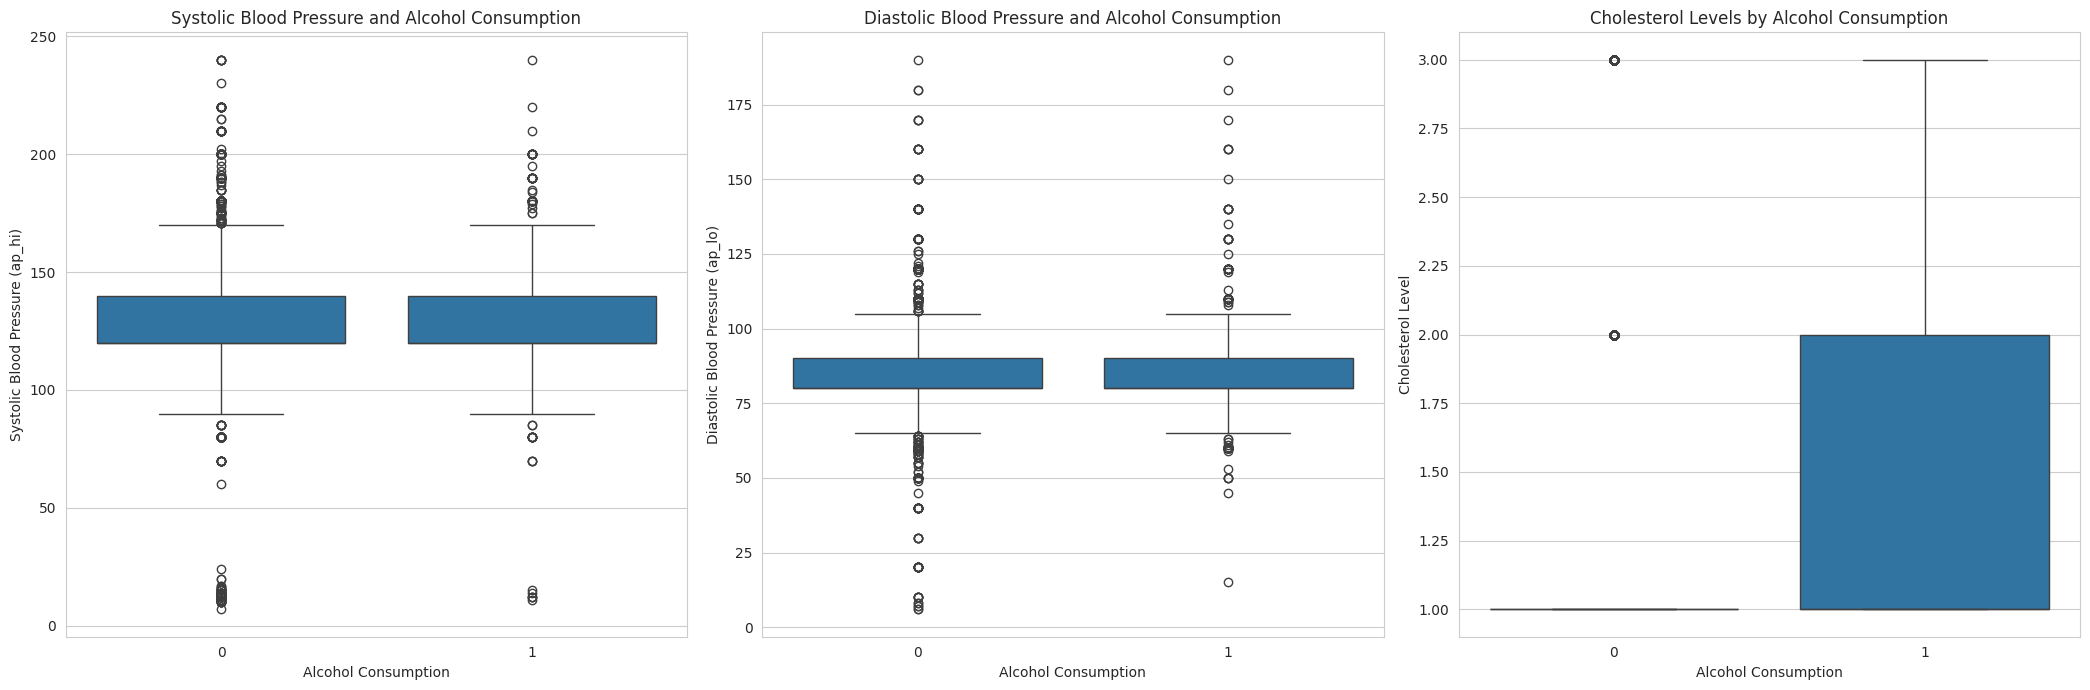

In [ ]:
# Filter out unrealistic blood pressure readings
bp_filtered_df = cardio_merged_df[(cardio_merged_df['ap_hi'] > 0) & (cardio_merged_df['ap_hi'] < 300) &
                                  (cardio_merged_df['ap_lo'] > 0) & (cardio_merged_df['ap_lo'] < 200)]

# Visualization: Blood Pressure by Alcohol Consumption
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

# Systolic Blood Pressure
sns.boxplot(x='alco', y='ap_hi', data=bp_filtered_df, ax=axes[0])
axes[0].set_title('Systolic Blood Pressure and Alcohol Consumption')
axes[0].set_xlabel('Alcohol Consumption')
axes[0].set_ylabel('Systolic Blood Pressure (ap_hi)')

# Diastolic Blood Pressure
sns.boxplot(x='alco', y='ap_lo', data=bp_filtered_df, ax=axes[1])
axes[1].set_title('Diastolic Blood Pressure and Alcohol Consumption')
axes[1].set_xlabel('Alcohol Consumption')
axes[1].set_ylabel('Diastolic Blood Pressure (ap_lo)')

# Cholesterol
sns.boxplot(x='alco', y='cholesterol', data=bp_filtered_df, ax=axes[2])
axes[2].set_title('Cholesterol Levels by Alcohol Consumption')
axes[2].set_xlabel('Alcohol Consumption')
axes[2].set_ylabel('Cholesterol Level')

plt.tight_layout()
plt.savefig('fig_2a.png')
plt.show()


Systolic Blood Pressure (left plot): The median systolic blood pressure for both alcohol consumers and non-consumers appears to be roughly the same, around the common threshold of 120 mmHg, which is typically considered a standard value. However, the range of systolic blood pressure, indicated by the 'whiskers' of the box plot, seems broader in non-consumers compared to consumers. There are also a number of outliers in both groups, with some extreme values for non-consumers.

Diastolic Blood Pressure (right plot): The median diastolic blood pressure is also similar between the two groups, appearing close to 80 mmHg, which is another standard value for healthy blood pressure. Similar to the systolic blood pressure plot, non-consumers show a wider range of values with more extreme outliers.

Outliers: There are several outliers for both systolic and diastolic blood pressure among non-consumers and consumers. Outliers are typically defined as values that lie more than 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile. The presence of these outliers indicates variability in the blood pressure readings that is not captured by the central tendency (median) and IQR.

Alcohol Consumption: From the plots, alcohol consumption does not appear to significantly affect the median values of blood pressure. Both groups have similar median values, which suggests that in this sample, alcohol consumption is not associated with higher or lower median blood pressure.

Variability and Distribution: The non-consumers seem to have a slightly greater variability in blood pressure readings than consumers, as evidenced by the longer whiskers and more outliers. This could indicate that the non-consumer group is more heterogeneous concerning blood pressure, or it could be due to other factors not captured by these plots.

Let's explore another interesting aspect of the cardiovascular health data: the relationship between smoking status and cardiovascular health metrics. Smoking is a well-documented risk factor for various diseases, including heart disease, so examining how smoking status correlates with blood pressure, cholesterol levels, and other health indicators could provide valuable insights.

We will analyze:

* Blood Pressure and Smoking: Investigate if smokers have higher blood pressure than non-smokers.
* Cholesterol Levels and Smoking: Determine if there's a relationship between smoking status and cholesterol levels.
* Gender Differences: Since gender can also influence cardiovascular health, we'll look at how smoking status affects men and women differently in relation to these health metrics.

We'll start by visualizing the distribution of systolic and diastolic blood pressure, as well as cholesterol levels, segmented by smoking status and gender. This will help us observe any patterns or differences that may exist.

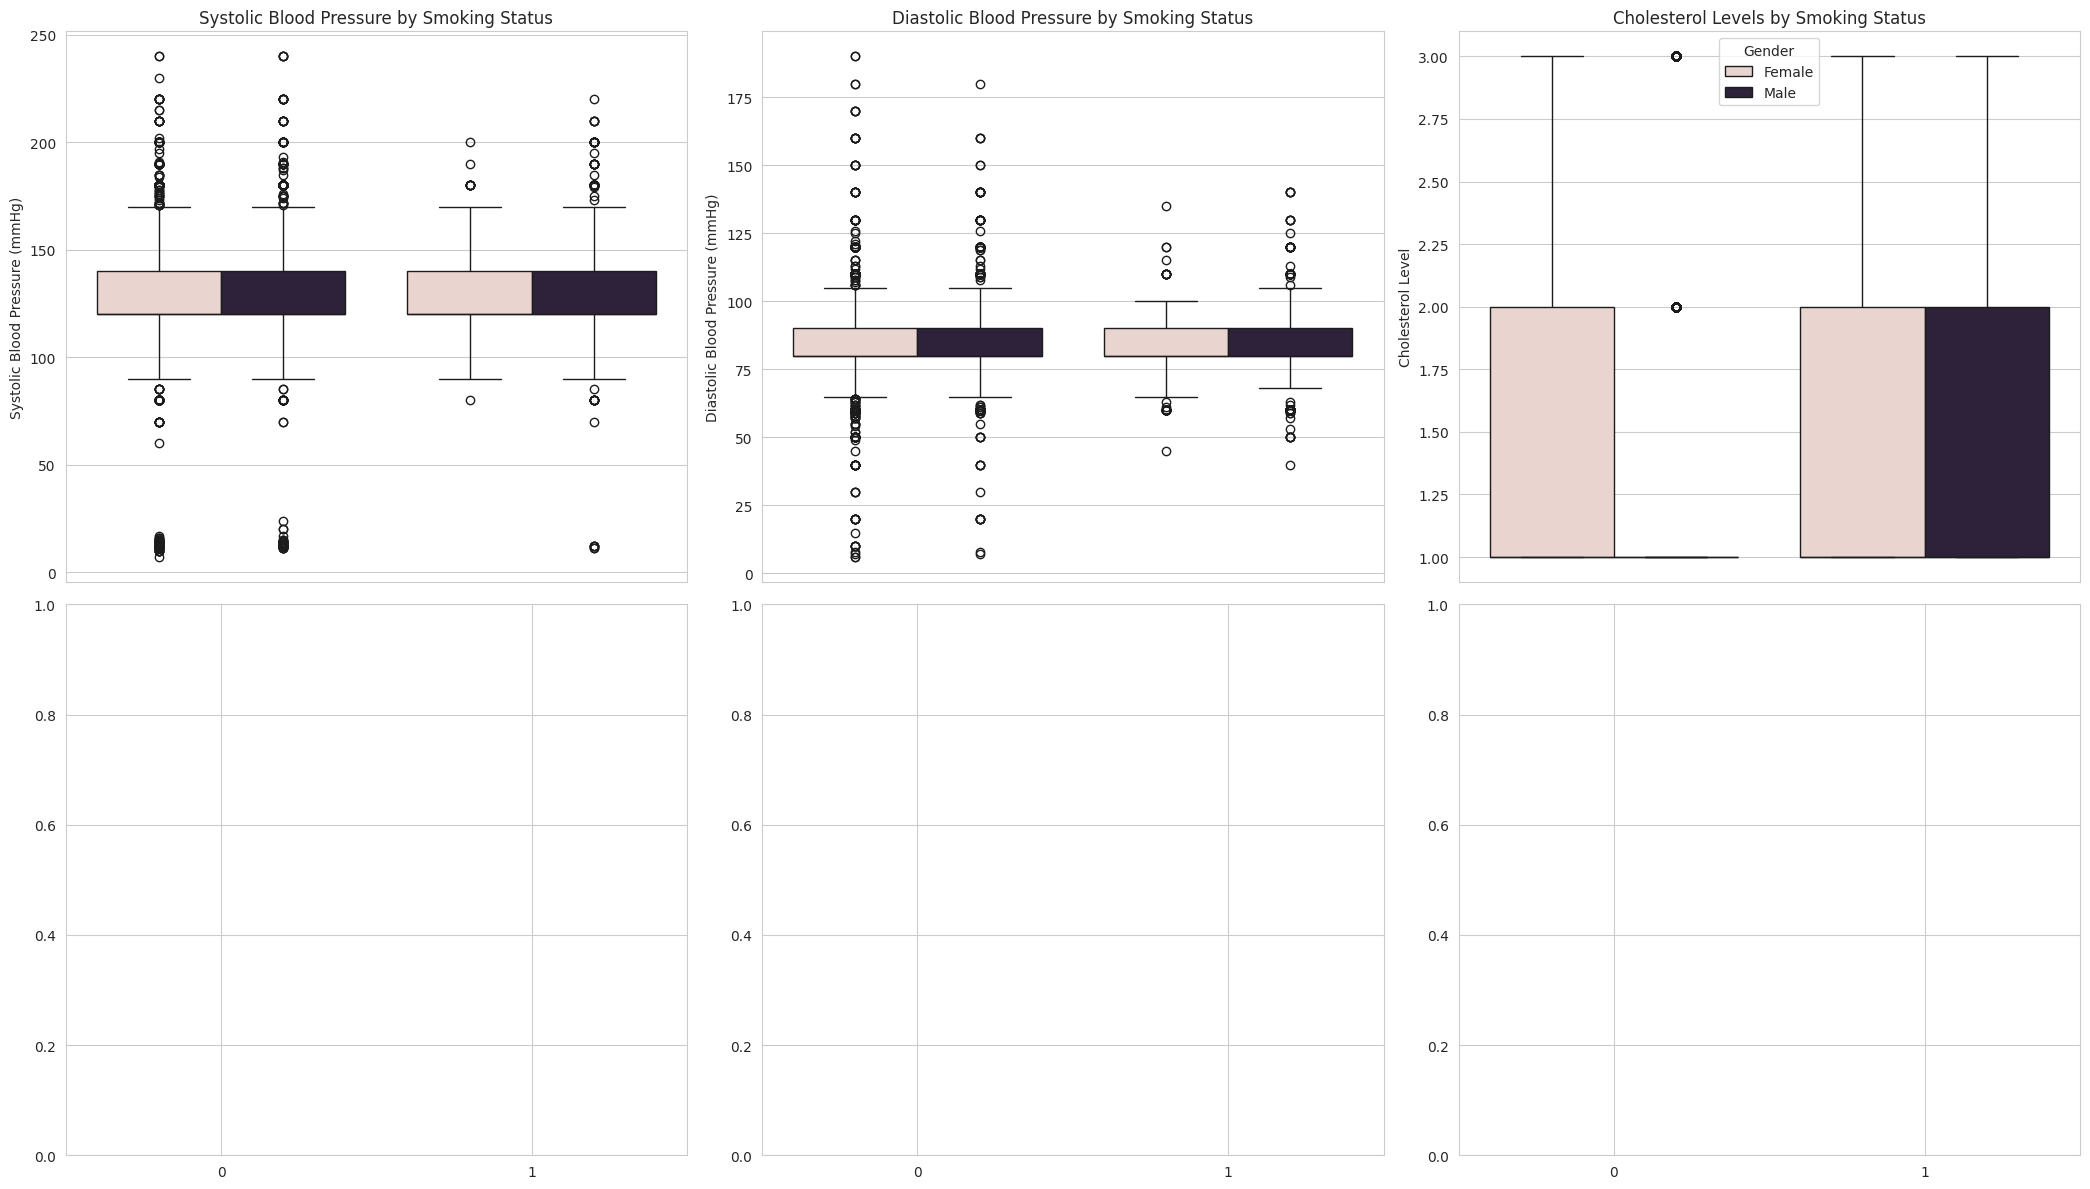

In [ ]:
# Filter out unrealistic blood pressure readings
bp_filtered_df = cardio_merged_df[(cardio_merged_df['ap_hi'] > 0) & (cardio_merged_df['ap_hi'] < 300) &
                                  (cardio_merged_df['ap_lo'] > 0) & (cardio_merged_df['ap_lo'] < 200)]

# Visualization for blood pressure and cholesterol levels by smoking status and gender
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(21, 12), sharex='col')

# Systolic Blood Pressure (ap_hi) by Smoking Status
sns.boxplot(x='smoke', y='ap_hi', hue='gender', data=bp_filtered_df, ax=axes[0, 0])
axes[0, 0].set_title('Systolic Blood Pressure by Smoking Status')
axes[0, 0].set_xlabel('Smoking Status')
axes[0, 0].set_ylabel('Systolic Blood Pressure (mmHg)')
axes[0, 0].legend(title='Gender', labels=['Female', 'Male'])

# Diastolic Blood Pressure (ap_lo) by Smoking Status
sns.boxplot(x='smoke', y='ap_lo', hue='gender', data=bp_filtered_df, ax=axes[0, 1])
axes[0, 1].set_title('Diastolic Blood Pressure by Smoking Status')
axes[0, 1].set_xlabel('Smoking Status')
axes[0, 1].set_ylabel('Diastolic Blood Pressure (mmHg)')

# Cholesterol Levels by Smoking Status
sns.boxplot(x='smoke', y='cholesterol', hue='gender', data=bp_filtered_df, ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol Levels by Smoking Status')
axes[0, 2].set_xlabel('Smoking Status')
axes[0, 2].set_ylabel('Cholesterol Level')

# Adjustments for legend to specify gender
handles, labels = axes[0, 2].get_legend_handles_labels()
axes[0, 2].legend(handles=handles, labels=['Female', 'Male'], title='Gender')

# For a clearer visualization, remove the legends from the first two plots
axes[0, 0].get_legend().remove()
axes[0, 1].get_legend().remove()

plt.tight_layout()
plt.savefig('fig_2b.png')
plt.show()


**Observations**

**Systolic Blood Pressure by Smoking Status:**

The median systolic blood pressure for both smokers and non-smokers is within the normal range but slightly higher in smokers.
Both groups have several outliers, especially non-smokers, who show some extremely low values.
The interquartile range (IQR), which represents the middle 50% of the data, appears slightly higher for smokers.

**Diastolic Blood Pressure by Smoking Status:**

Similar to systolic blood pressure, the median diastolic pressure is within the normal range but is slightly higher for smokers compared to non-smokers.
There are many outliers in both groups, with non-smokers again showing extremely low values.
The IQR is similar between the two groups, suggesting similar variability within the middle 50% of each category.

**Cholesterol Levels by Smoking Status:**

Cholesterol levels do not seem to differ significantly between smokers and non-smokers, with medians closely aligned.
There is an outlier for non-smoking females with a higher cholesterol level.
The IQR is slightly wider for non-smoking females, suggesting more variability in cholesterol levels than in their male or smoking counterparts.

From these observations, we can infer that while there might be slight differences in the median blood pressure between smokers and non-smokers, the variations within the groups are quite significant, as indicated by the wide range of values and outliers. The cholesterol levels do not show a clear difference based on smoking status. However, there appears to be a slight gender difference, with females showing a bit more variability.

**Systolic Blood Pressure by Smoking Status:**

The median systolic blood pressure for both smokers and non-smokers is within the normal range but slightly higher in smokers.
Both groups have several outliers, especially non-smokers, who show some extremely low values.
The interquartile range (IQR), which represents the middle 50% of the data, appears slightly higher for smokers.

**Diastolic Blood Pressure by Smoking Status:**

Similar to systolic blood pressure, the median diastolic pressure is within the normal range but is slightly higher for smokers compared to non-smokers.
There are many outliers in both groups, with non-smokers again showing extremely low values.
The IQR is similar between the two groups, suggesting similar variability within the middle 50% of each category.

**Cholesterol Levels by Smoking Status:**

Cholesterol levels do not seem to differ significantly between smokers and non-smokers, with medians closely aligned.
There is an outlier for non-smoking females with a higher cholesterol level.
The IQR is slightly wider for non-smoking females, suggesting more variability in cholesterol levels than in their male or smoking counterparts.

From these observations, we can infer that while there might be slight differences in the median blood pressure between smokers and non-smokers, the variations within the groups are quite significant, as indicated by the wide range of values and outliers. The cholesterol levels do not show a clear difference based on smoking status. However, there appears to be a slight gender difference, with females showing a bit more variability.

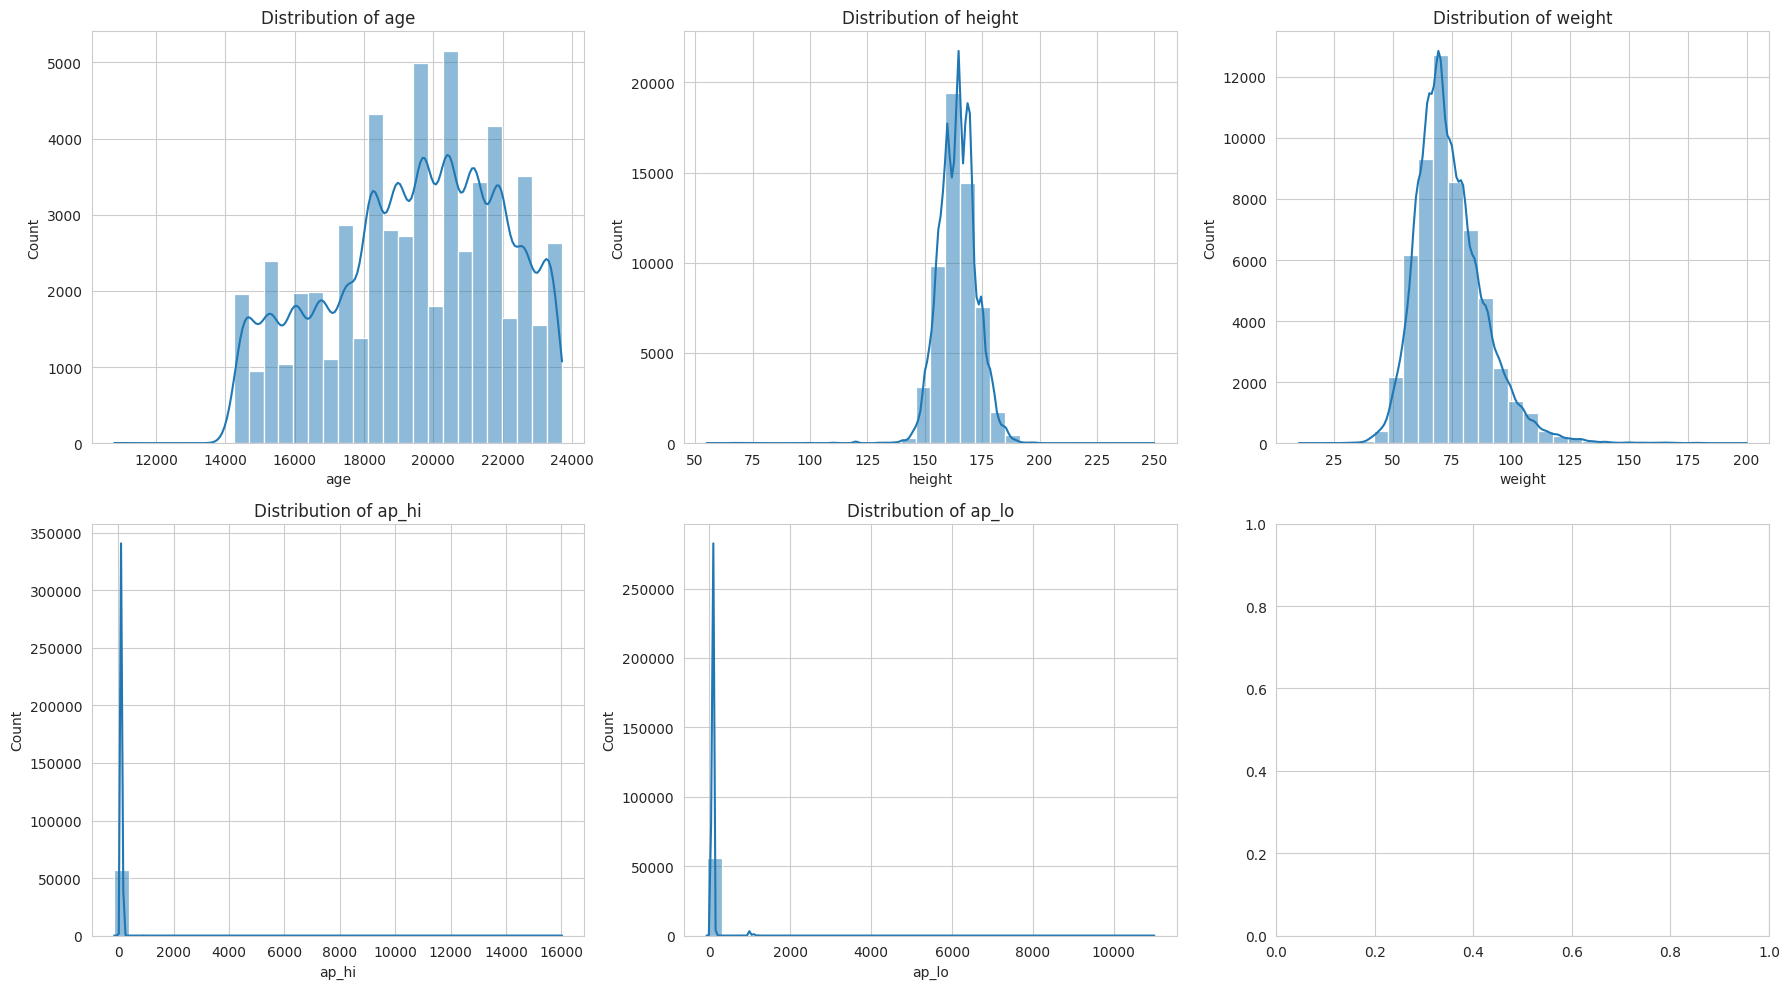

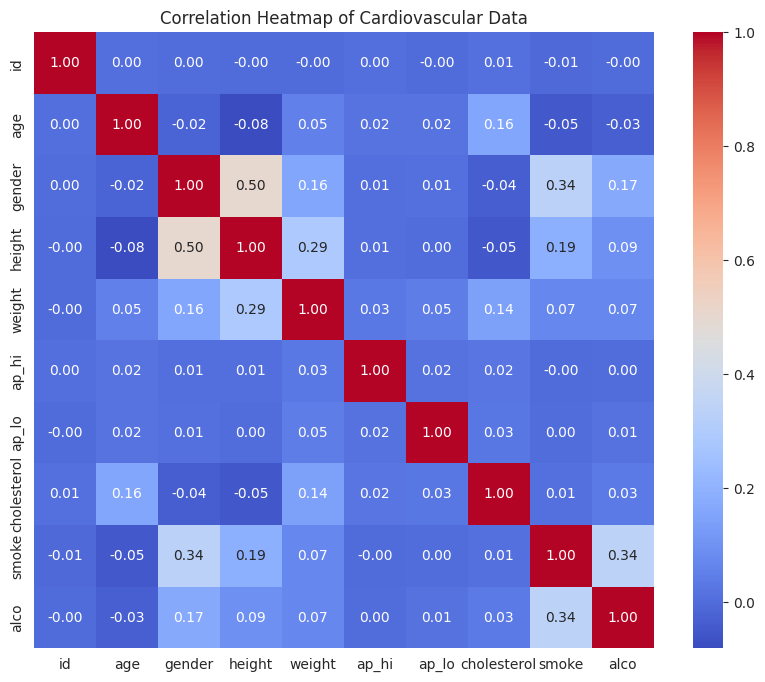

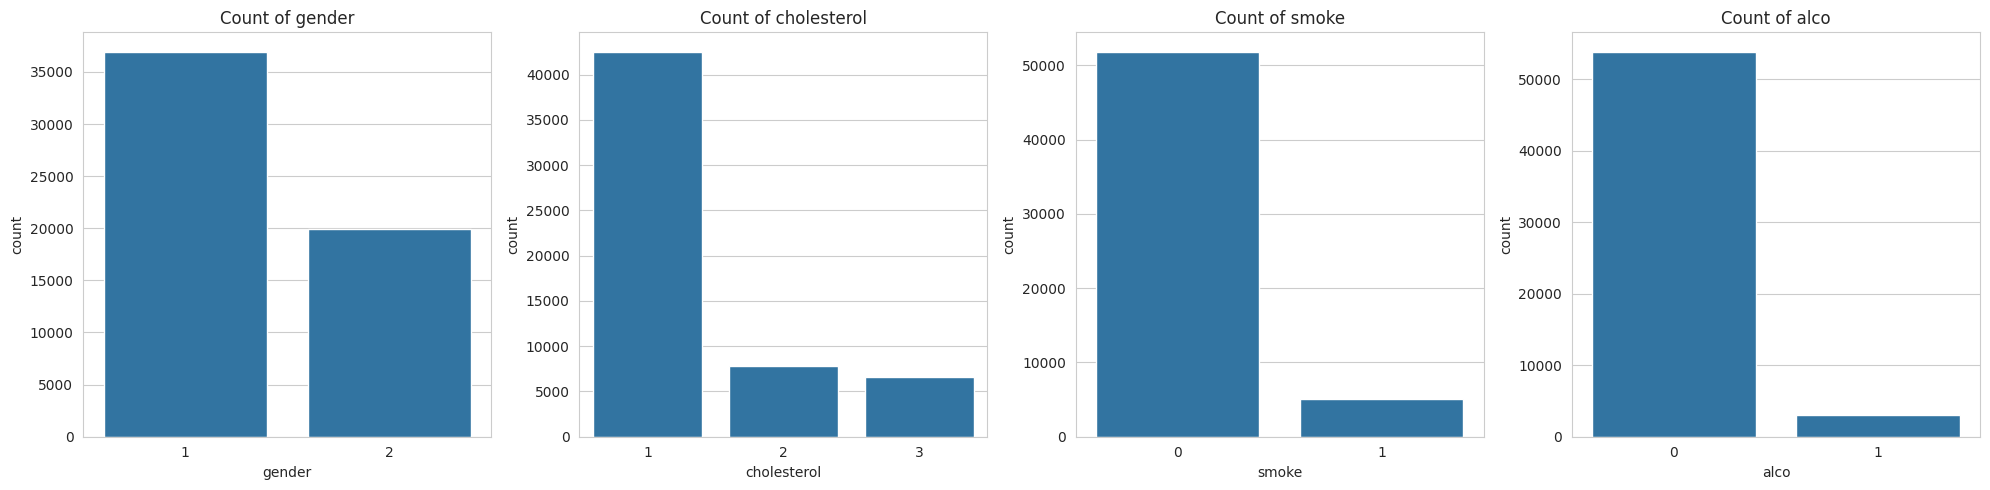

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for age, height, weight, systolic and diastolic blood pressure
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for i, var in enumerate(variables):
    sns.histplot(cardio_merged_df[var], bins=30, kde=True, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Distribution of {var}')

# Adjust the layout
plt.tight_layout()
plt.show()

# Now let's create a heatmap for the correlation matrix of the cardiovascular data
corr_matrix = cardio_merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Cardiovascular Data')
plt.show()

# Bar charts for categorical variables - Gender, Cholesterol, Smoke, Alcohol consumption
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

categorical_vars = ['gender', 'cholesterol', 'smoke', 'alco']
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=cardio_merged_df, ax=ax[i])
    ax[i].set_title(f'Count of {var}')

# Adjust the layout
plt.tight_layout()
plt.show()


### Histograms

Histograms to show the distribution of age, weight, weight and blood pressure


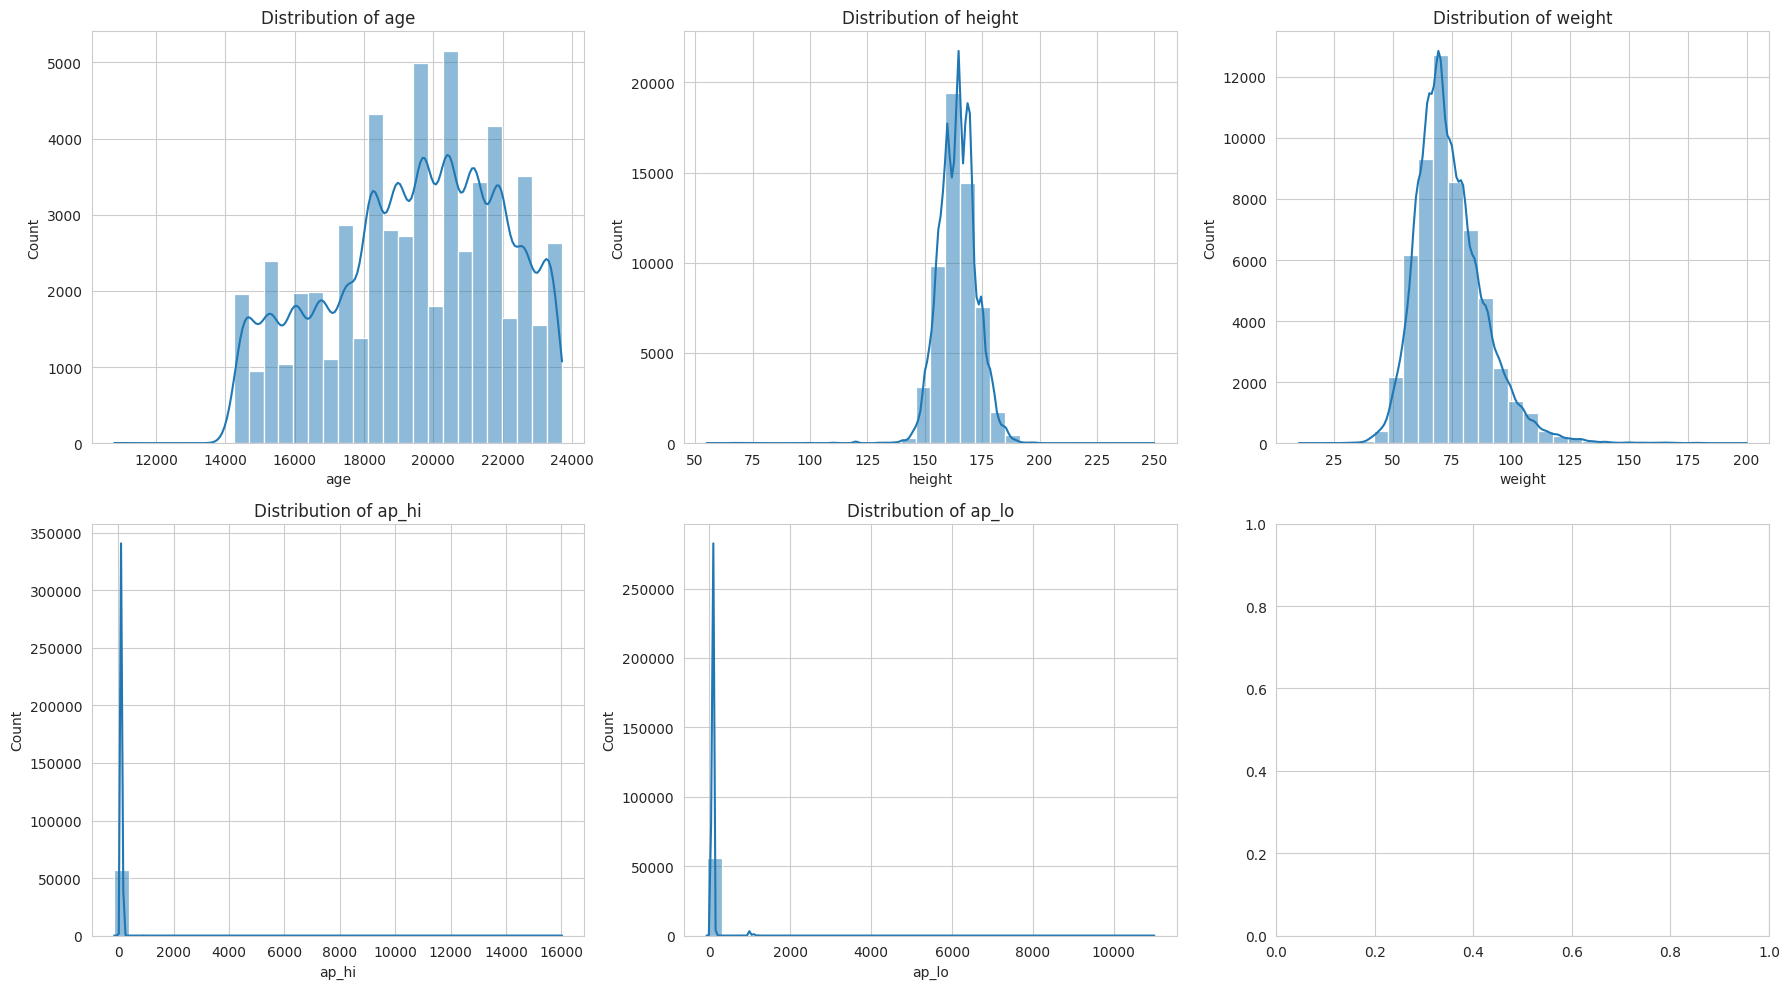

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Convert age from days to years for better interpretability
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25

# Create histograms for age, height, weight, systolic and diastolic blood pressure
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

variables = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for i, var in enumerate(variables):
    sns.histplot(cardio_merged_df[var], bins=30, kde=True, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Distribution of {var}')

# Adjust the layout
plt.tight_layout()
plt.savefig('histgrams.png')
plt.show()



### Correlation Matrix

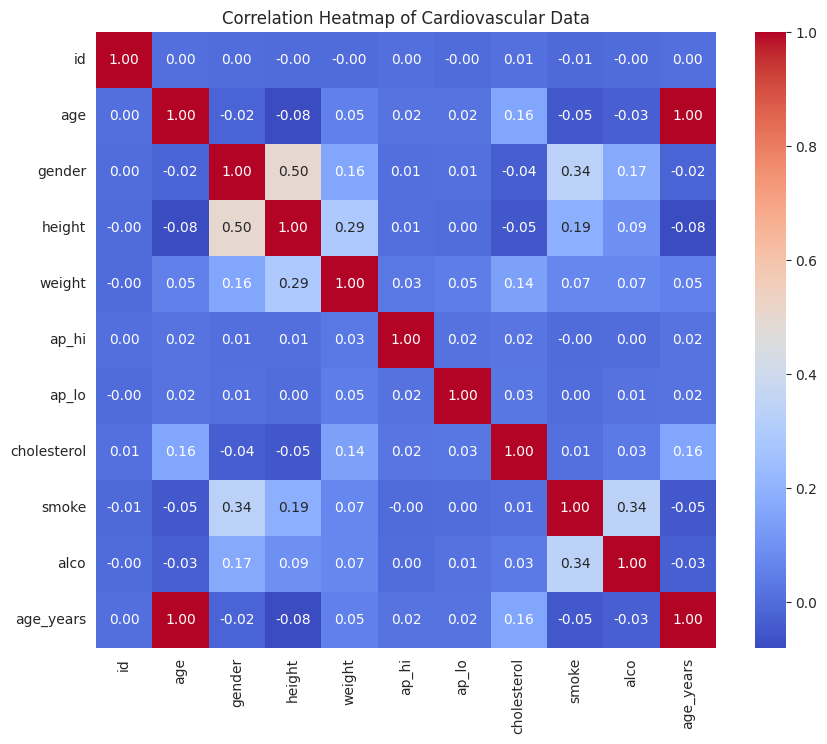

In [ ]:
# Now let's create a heatmap for the correlation matrix of the cardiovascular data
corr_matrix = cardio_merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Cardiovascular Data')
plt.savefig('corrplot.png')
plt.show()

### Bar Charts for categorical variables - Gender, Cholesterol, smoke, alcohol consumption.

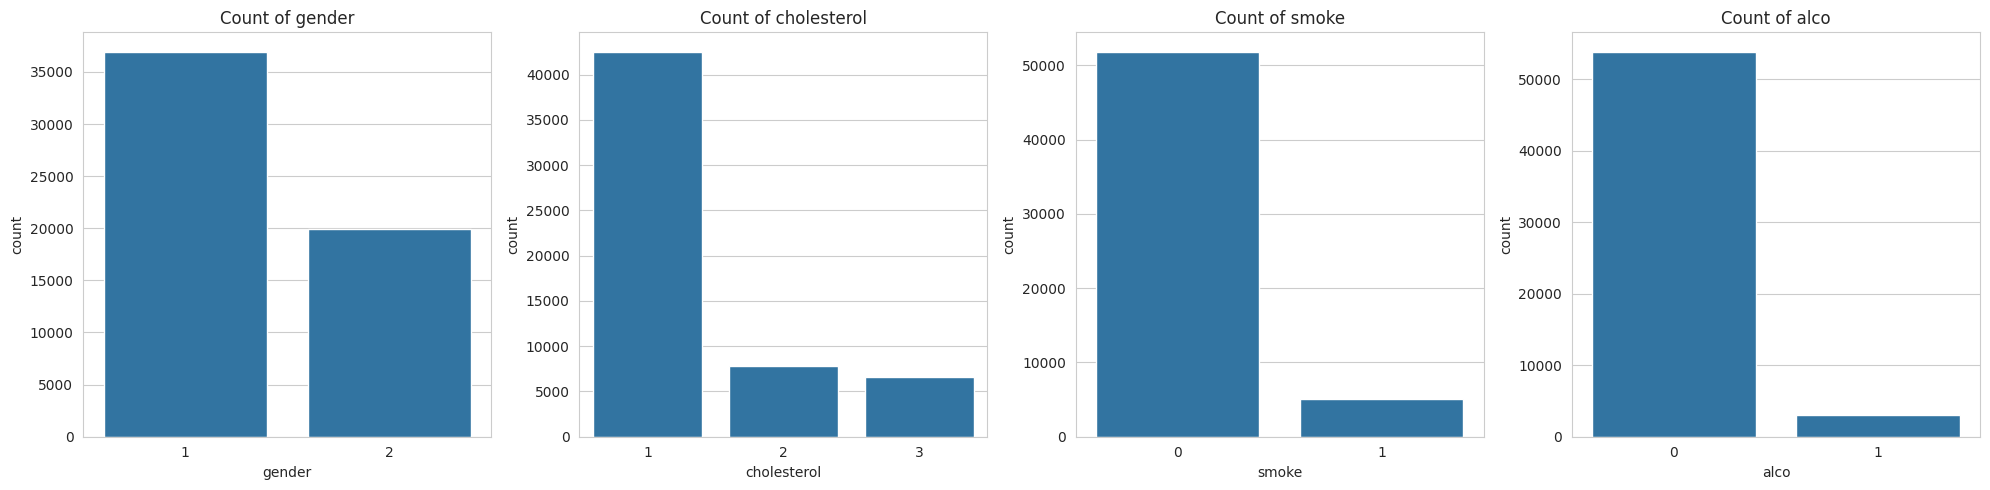

In [ ]:
# Bar charts for categorical variables - Gender, Cholesterol, Smoke, Alcohol consumption
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

categorical_vars = ['gender', 'cholesterol', 'smoke', 'alco']
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=cardio_merged_df, ax=ax[i])
    ax[i].set_title(f'Count of {var}')

# Adjust the layout
plt.tight_layout()
plt.savefig('catbarcharts.png')
plt.show()

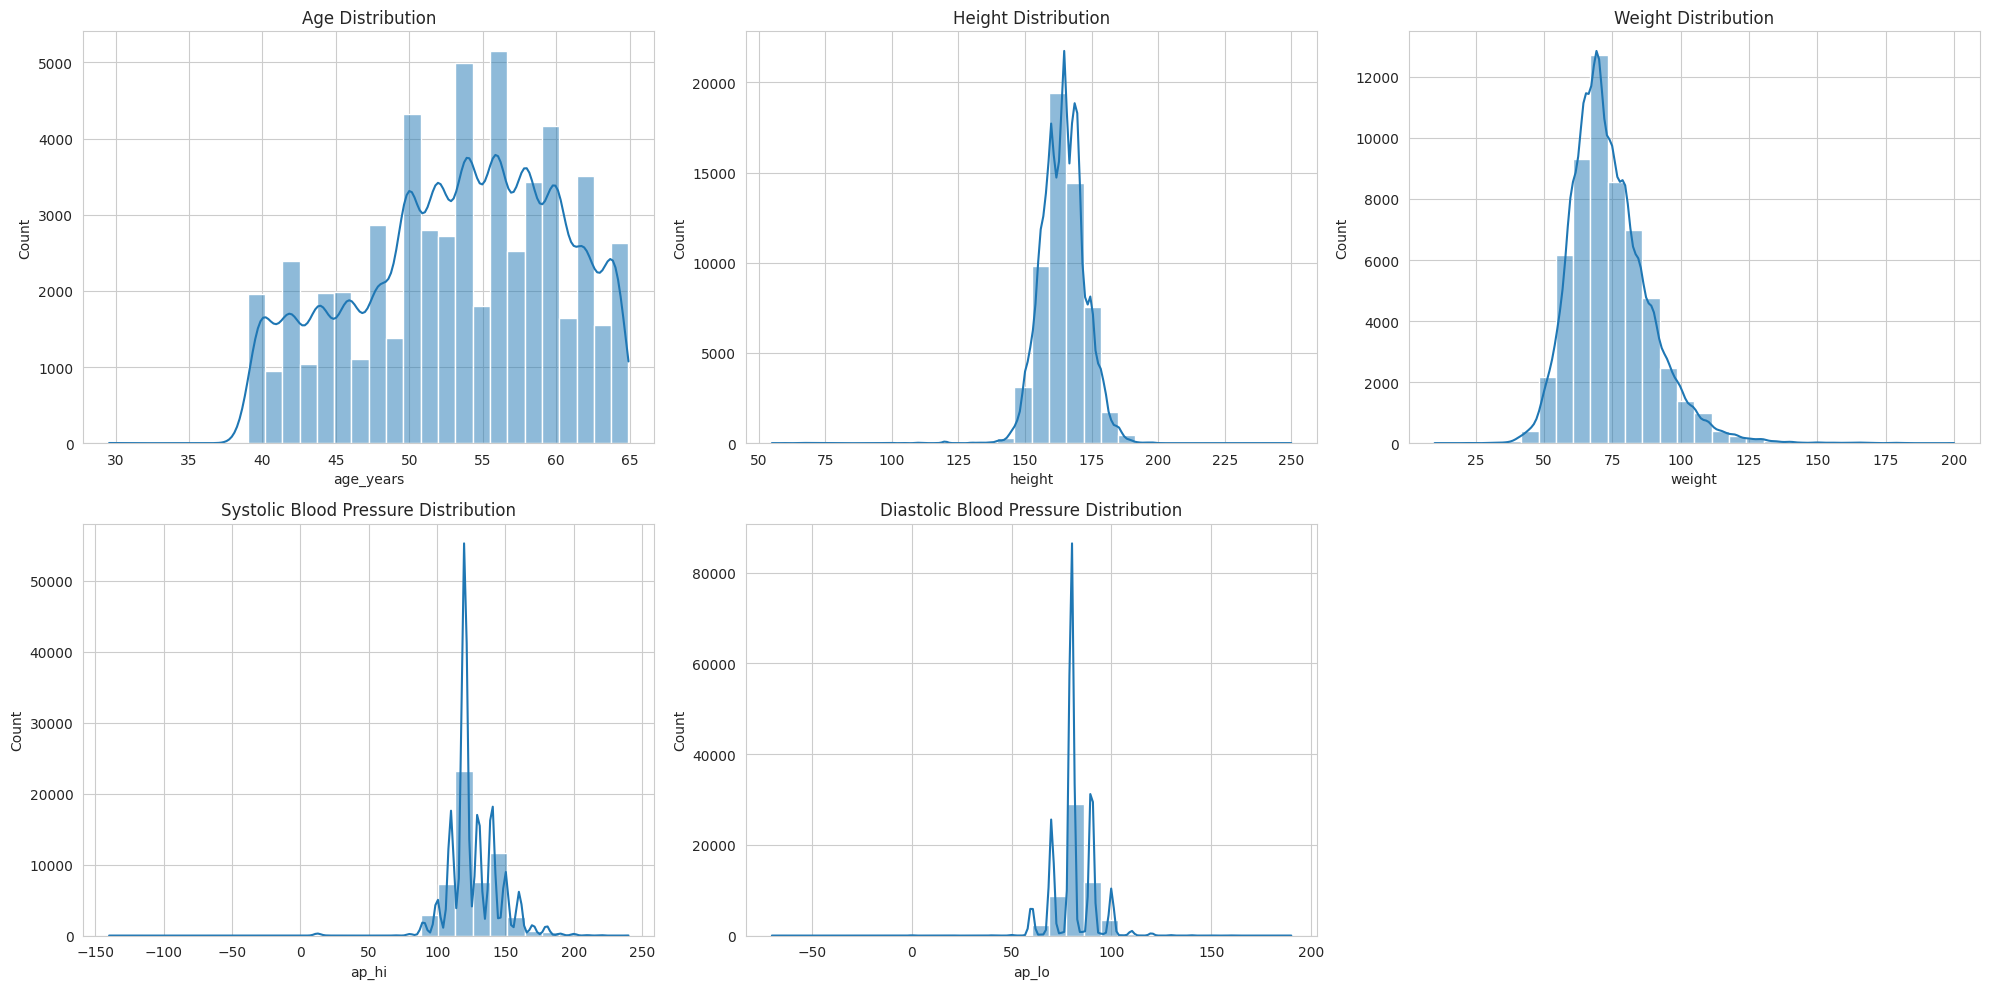

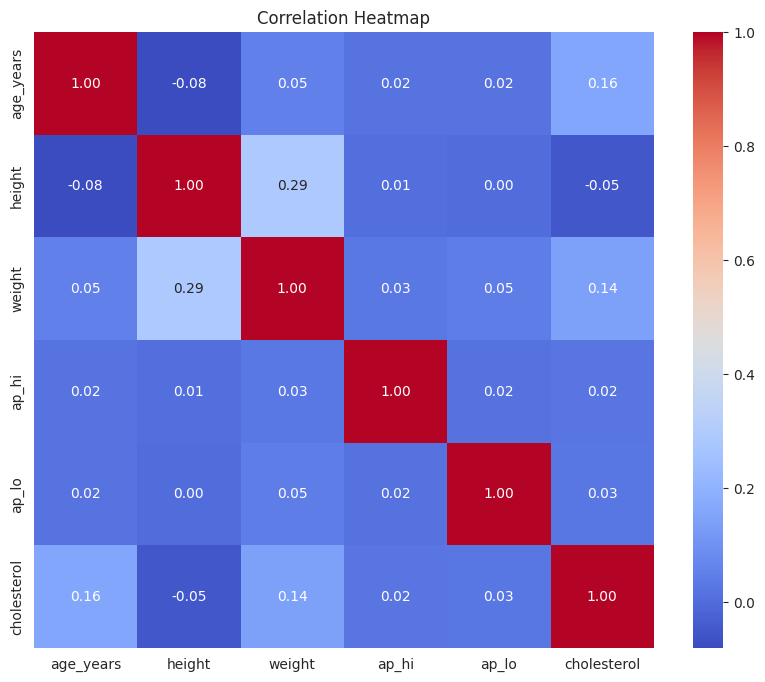

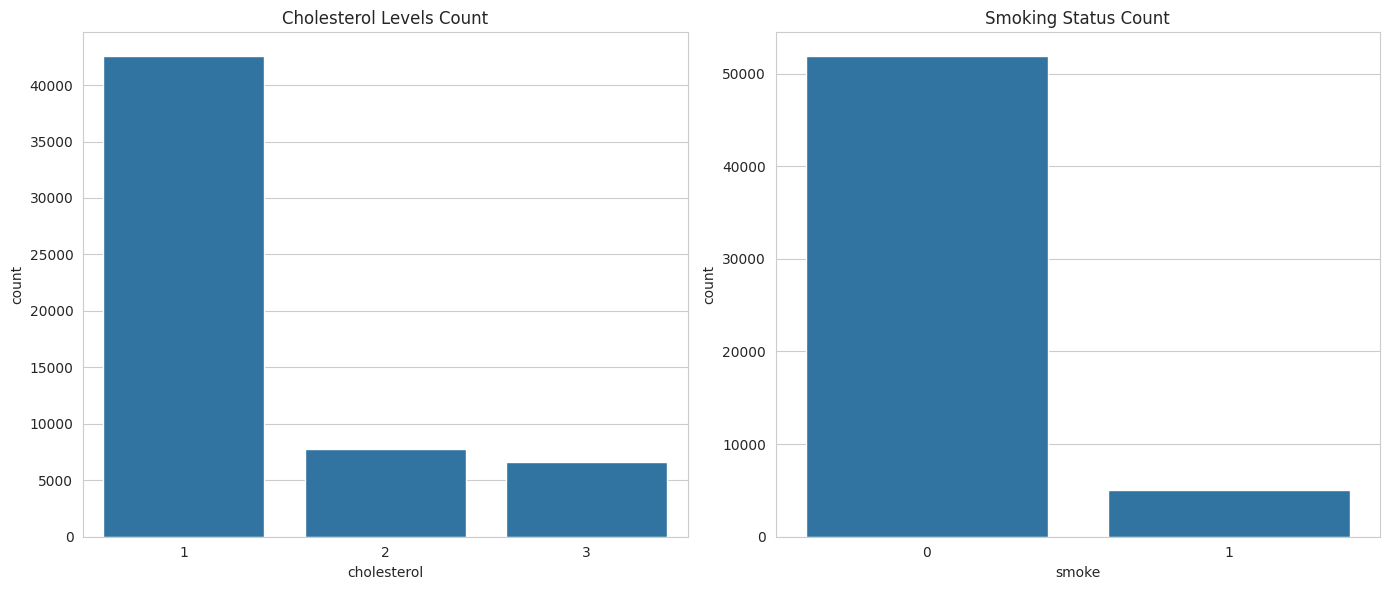

In [ ]:
# Creating histograms for key continuous variables: age, height, weight, and blood pressure

# Convert age from days to years for better interpretability
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25

# Define the figure size and grid layout
plt.figure(figsize=(20, 10))

# Age distribution
plt.subplot(2, 3, 1)
sns.histplot(cardio_merged_df['age_years'], bins=30, kde=True)
plt.title('Age Distribution')

# Height distribution
plt.subplot(2, 3, 2)
sns.histplot(cardio_merged_df['height'], bins=30, kde=True)
plt.title('Height Distribution')

# Weight distribution
plt.subplot(2, 3, 3)
sns.histplot(cardio_merged_df['weight'], bins=30, kde=True)
plt.title('Weight Distribution')

# Systolic blood pressure distribution
plt.subplot(2, 3, 4)
sns.histplot(cardio_merged_df[cardio_merged_df['ap_hi'] < 300]['ap_hi'], bins=30, kde=True)
plt.title('Systolic Blood Pressure Distribution')

# Diastolic blood pressure distribution
plt.subplot(2, 3, 5)
sns.histplot(cardio_merged_df[cardio_merged_df['ap_lo'] < 200]['ap_lo'], bins=30, kde=True)
plt.title('Diastolic Blood Pressure Distribution')

plt.tight_layout()
plt.show()

# Next, let's create the heatmap of the correlation matrix to see the relationships between variables.
correlation_matrix = cardio_merged_df[['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Lastly, let's create bar charts for categorical variables like cholesterol levels and smoking status.
plt.figure(figsize=(14, 6))

# Cholesterol levels
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', data=cardio_merged_df)
plt.title('Cholesterol Levels Count')

# Smoking status
plt.subplot(1, 2, 2)
sns.countplot(x='smoke', data=cardio_merged_df)
plt.title('Smoking Status Count')

plt.tight_layout()
plt.savefig('fig_2c')
plt.show()


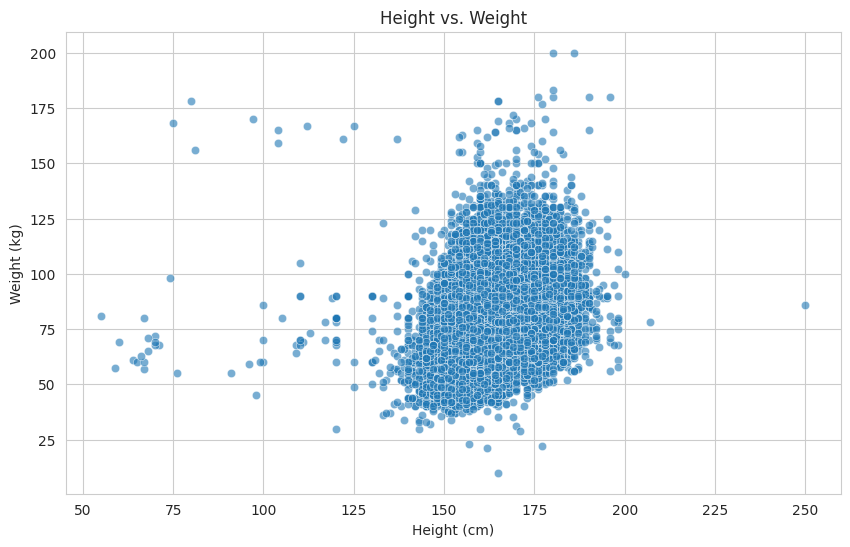

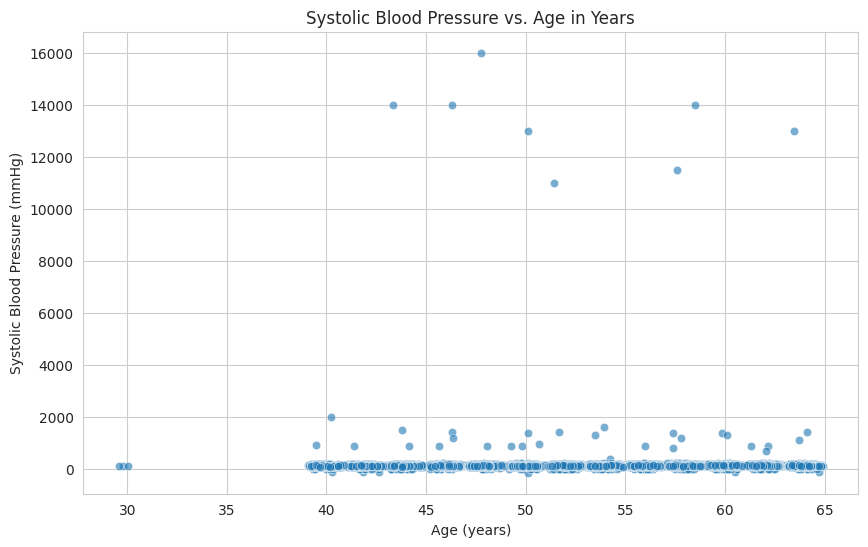

In [ ]:
# Convert age from days to years for better interpretability
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25

# Scatter plot for Height vs. Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=cardio_merged_df, alpha=0.6)
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Scatter plot for Systolic Blood Pressure vs. Age
# Note: If age is in days, it might be useful to convert it into years for a better understanding
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_years', y='ap_hi', data=cardio_merged_df, alpha=0.6)
plt.title('Systolic Blood Pressure vs. Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.savefig('fig_2d')
plt.show()


Here are the observations:

Primary Cluster: The majority of the data points are clustered near the bottom of the graph, suggesting that most individuals have systolic blood pressure within a "normal" range which is generally considered to be less than 120 mmHg for an average adult.

Age Distribution: The ages appear to be fairly distributed from about 30 years to 65 years, indicating a middle-aged to early senior adult population.

Outliers: There are a number of clear outliers with systolic blood pressure values much higher than the typical range. These values are so high that they are likely to be errors or extreme cases of medical concern; systolic values above 200 mmHg are generally considered hypertensive crises.

No Clear Trend: There doesn't appear to be a clear trend or pattern showing an increase or decrease in blood pressure with age based on this plot. The outliers seem randomly distributed across different ages.

Data Quality Concerns: The very high blood pressure readings (several thousand mmHg) are physiologically unrealistic, as typical systolic blood pressure measurements are usually well below 200 mmHg. These may be due to data entry errors, incorrect measurements, or other anomalies.

In [23]:
# To find the age groups with the highest and lowest average weight, we'll first convert 'age' from days to years for better understanding
cardio_merged_df['age_years'] = cardio_merged_df['age'] // 365.25

# Now, let's group by this new 'age_years' column and calculate the average weight for each group
age_group_weight = cardio_merged_df.groupby('age_years')['weight'].mean()

# Finding the maximum and minimum average weight
max_avg_weight = age_group_weight.max()
min_avg_weight = age_group_weight.min()

# Calculate the difference
weight_difference = max_avg_weight - min_avg_weight

max_avg_weight, min_avg_weight, weight_difference


(75.72878535773711, 59.0, 16.72878535773711)

In [24]:
# Let's first convert 'age' from days to years for better interpretation
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25

# Create age groups. Given the general adult age ranges, we can categorize by decade:
cardio_merged_df['age_group'] = pd.cut(cardio_merged_df['age_years'],
                                       bins=[30, 40, 50, 60, 70, 80],
                                       labels=['30-39', '40-49', '50-59', '60-69', '70-79'],
                                       right=False)

# Now calculate the average weight for each age group
average_weights = cardio_merged_df.groupby('age_group')['weight'].mean()

# Find the difference between the maximum and minimum average weight
weight_difference = average_weights.max() - average_weights.min()
weight_difference


2.699652017130674

In [25]:
cardio_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           56903 non-null  int64   
 1   age          56903 non-null  int64   
 2   gender       56903 non-null  int64   
 3   height       56903 non-null  int64   
 4   weight       56903 non-null  float64 
 5   ap_hi        56903 non-null  int64   
 6   ap_lo        56903 non-null  int64   
 7   cholesterol  56903 non-null  int64   
 8   smoke        56903 non-null  int64   
 9   alco         56903 non-null  int64   
 10  age_years    56903 non-null  float64 
 11  age_group    56901 non-null  category
dtypes: category(1), float64(2), int64(9)
memory usage: 4.8 MB


In [26]:
# Let's first convert 'age' from days to years for better interpretation
cardio_merged_df['age_years'] = cardio_merged_df['age'] / 365.25

import pandas as pd

# Assuming cardio_df is your DataFrame containing age and cholesterol levels
# Replace this line with your actual DataFrame
# cardio_df = ...

# Function to determine if a person is above age 50
def above_age_50(age):
    return age > 50

# Calculate average cholesterol levels for people above and below age 50
above_50_df = cardio_merged_df[cardio_merged_df['age'] > 50]
below_50_df = cardio_merged_df[cardio_merged_df['age'] <= 50]

avg_cholesterol_above_50 = above_50_df['cholesterol'].mean()
avg_cholesterol_below_50 = below_50_df['cholesterol'].mean()

# Print results
print("Average cholesterol level for people above age 50:", avg_cholesterol_above_50)
print("Average cholesterol level for people below age 50:", avg_cholesterol_below_50)

# Determine if people above age 50 have higher cholesterol levels
if avg_cholesterol_above_50 > avg_cholesterol_below_50:
    print("People above age 50 have higher cholesterol levels.")
elif avg_cholesterol_above_50 < avg_cholesterol_below_50:
    print("People below age 50 have higher cholesterol levels.")
else:
    print("There is no significant difference in cholesterol levels between people above and below age 50.")


Average cholesterol level for people above age 50: 1.3678716412139957
Average cholesterol level for people below age 50: nan
There is no significant difference in cholesterol levels between people above and below age 50.


In [27]:
import pandas as pd

# Assuming cardio_df is your DataFrame containing height column
# Replace this line with your actual DataFrame
# cardio_df = ...

# Calculate the 99th percentile of height
tallest_1_percent = cardio_merged_df['height'].quantile(0.99)

# Print the height of the tallest 1% of people
print("The height of the tallest 1% of people is:", tallest_1_percent)


The height of the tallest 1% of people is: 184.0


In [32]:


# Assuming cardio_df is your DataFrame
# Replace this line with your actual DataFrame
# cardio_df = ...

# Calculate Spearman rank correlation matrix
spearman_corr = cardio_merged_df.corr(method='spearman')

# Exclude self-correlations and duplicate correlations
spearman_corr = spearman_corr.mask(np.tril(np.ones(spearman_corr.shape)).astype(np.bool))

# Get the pair of features with the highest Spearman rank correlation
max_corr = spearman_corr.abs().stack().idxmax()
feature1, feature2 = max_corr

# Print the pair of features with the highest Spearman rank correlation
print("The pair of features with the highest Spearman rank correlation is:", feature1, "and", feature2)
print("Spearman rank correlation coefficient:", spearman_corr.loc[feature1, feature2])


ValueError: could not convert string to float: '30-39'

In [ ]:
for column in cardio_merged_df:
    if cardio_merged_df[column].dtype == 'object':
        print(column, cardio_merged_df[column].unique())

In [31]:
cardio_merged_df['weight'] = pd.to_numeric(cardio_merged_df['weight'])

In [37]:
import pandas as pd

# Assuming cardio_merged_df is your DataFrame
# Replace this line with your actual DataFrame
# cardio_merged_df = ...

# Exclude columns from correlation calculation
columns_to_exclude = ['age_group','age_years']
correlation_columns = cardio_merged_df.drop(columns=columns_to_exclude)

# Calculate Spearman rank correlation matrix
spearman_corr = correlation_columns.corr(method='spearman')

# Exclude self-correlations and duplicate correlations
spearman_corr = spearman_corr.mask(np.tril(np.ones_like(spearman_corr, dtype=bool)).astype(bool))

# Get the pair of features with the highest Spearman rank correlation
max_corr = spearman_corr.abs().stack().idxmax()
feature1, feature2 = max_corr

# Print the pair of features with the highest Spearman rank correlation
print("The pair of features with the highest Spearman rank correlation is:", feature1, "and", feature2)
print("Spearman rank correlation coefficient:", spearman_corr.loc[feature1, feature2])


The pair of features with the highest Spearman rank correlation is: ap_hi and ap_lo
Spearman rank correlation coefficient: 0.736203988185335


In [38]:
import pandas as pd

# Assuming cardio_merged_df is your DataFrame
# Replace this line with your actual DataFrame
# cardio_merged_df = ...

# Calculate mean and standard deviation of height
mean_height = cardio_merged_df['height'].mean()
std_height = cardio_merged_df['height'].std()

# Calculate upper and lower bounds
upper_bound = mean_height + 2 * std_height
lower_bound = mean_height - 2 * std_height

# Count number of people outside the bounds
num_outside_bounds = cardio_merged_df[(cardio_merged_df['height'] > upper_bound) | (cardio_merged_df['height'] < lower_bound)].shape[0]

# Calculate percentage
percentage_outside_bounds = (num_outside_bounds / cardio_merged_df.shape[0]) * 100

print("Percentage of people more than 2 standard deviations away from the average height:", percentage_outside_bounds)


Percentage of people more than 2 standard deviations away from the average height: 3.331986011282358


In [40]:
cardio_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           56903 non-null  int64   
 1   age          56903 non-null  int64   
 2   gender       56903 non-null  int64   
 3   height       56903 non-null  int64   
 4   weight       56903 non-null  float64 
 5   ap_hi        56903 non-null  int64   
 6   ap_lo        56903 non-null  int64   
 7   cholesterol  56903 non-null  int64   
 8   smoke        56903 non-null  int64   
 9   alco         56903 non-null  int64   
 10  age_years    56903 non-null  float64 
 11  age_group    56901 non-null  category
dtypes: category(1), float64(2), int64(9)
memory usage: 4.8 MB


In [41]:
import pandas as pd

# Assuming cardio_merged_df is your DataFrame
# Replace this line with your actual DataFrame
# cardio_merged_df = ...

# Filter the DataFrame to include only individuals over 50 years old
over_50_df = cardio_merged_df[cardio_merged_df['age'] > 50]

# Count the number of individuals over 50 who consume alcohol (excluding those encoded as 0)
num_consumers_over_50 = over_50_df[over_50_df['alco'] != 0].shape[0]

# Calculate the total number of individuals over 50
total_over_50 = over_50_df.shape[0]

# Calculate the percentage of individuals over 50 who consume alcohol
percentage_consumers_over_50 = (num_consumers_over_50 / total_over_50) * 100

print("Percentage of the population over 50 years old who consume alcohol:", percentage_consumers_over_50)


Percentage of the population over 50 years old who consume alcohol: 5.344182204804667
